# Week 10 Problem Set


In [1]:
# %load_ext nb_mypy
# %nb_mypy On

In [2]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
from IPython.display import display

## Homeworks

**HW0.** Copy and paste some of the functions from you cohort sessions and previous exercises that you will need in this homework. See below template and the list here:
- `normalize_z()`
- `get_features_targets()`
- `calc_linreg()`
- `prepare_feature()`
- `predict_linreg()`
- `split_data()`
- `r2_score()`
- `mean_squared_error()`

Then do the following:
- Read the CSV file `housing_processed.csv` and extract the following columns:
    - x data: RM, DIS, and INDUS columns 
    - y data: MEDV column
- Normalize the features using z normalization. 
- Plot the data using scatter plot. Use the following columns:


In [4]:
def normalize_z(array: np.ndarray, 
                columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    ###
    ### YOUR CODE HERE
    ###
    if columns_means is None:
        columns_means = array.mean(axis=0)
    if columns_stds is None:
        columns_stds = array.std(axis=0)
        
    out = (array - columns_means) / columns_stds
    
    return out, columns_means, columns_stds


def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    ###
    ### YOUR CODE HERE
    ###
    df_feature = df[feature_names]
    df_target = df[target_names]
    
    return df_feature, df_target

def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    ###
    ### YOUR CODE HERE
    ###
    ones = np.ones(shape=(np_feature.shape[0], 1))
    return np.concatenate((ones, np_feature), axis=1)

def predict_linreg(df_feature: pd.DataFrame, 
                   beta: np.ndarray, 
                   means: Optional[np.ndarray]=None, 
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    ###
    ### YOUR CODE HERE
    ###
    df_feature = df_feature.to_numpy() if isinstance(df_feature, pd.DataFrame) else df_feature
    X, _, _ = normalize_z(df_feature, means, stds)
    X = prepare_feature(X)
    
    return calc_linreg(X, beta)

def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    ###
    ### YOUR CODE HERE
    ###
    return np.matmul(X, beta)

def split_data(df_feature: pd.DataFrame, 
               df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    ###
    ### YOUR CODE HERE
    ###
    np.random.seed(random_state)
    index = np.random.choice(df_feature.shape[0], int(df_feature.shape[0]*test_size), replace=False)
    
    df_feature_train = df_feature.drop(index)
    df_feature_test = df_feature.loc[index]
    df_target_train = df_target.drop(index)
    df_target_test = df_target.loc[index]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    ###
    ### YOUR CODE HERE
    ###
    ymean = y.mean()
    
    SS_res = np.matmul((y-ypred).T, (y-ypred))
    SS_tot = np.matmul((y-ymean).T, (y-ymean))
    
    print(SS_res.shape)
    
    return 1 - SS_res/SS_tot

def mean_squared_error(target: np.ndarray, pred: np.ndarray) -> float:
    ###
    ### YOUR CODE HERE
    ###
    return np.matmul((target-pred).T, target-pred) / target.shape[0]

In [5]:
# Read the CSV file
# df: pd.DataFrame = None
df = pd.read_csv('housing_processed.csv')

# Extract the features and the targets
# df_features, df_target = None, None
df_features, df_target = get_features_targets(df, ['RM', 'DIS', 'INDUS'], ['MEDV'])

# Normalize using z normalization
# array_features,_,_ = None, None, None
array_features = df_features.to_numpy() if isinstance(df_features, pd.DataFrame) else df_features
array_features, _, _ = normalize_z(array_features)

###
### YOUR CODE HERE
###

df_features: pd.DataFrame = pd.DataFrame(array_features, columns=df_features.columns)
display(df_features.describe())
display(df_target.describe())
assert np.isclose(df_features['RM'].mean(), 0)
assert np.isclose(df_features['DIS'].mean(), 0)
assert np.isclose(df_features['INDUS'].mean(), 0)

assert np.isclose(df_features['RM'].std(), 1, rtol=1e-3)
assert np.isclose(df_features['DIS'].std(), 1, rtol=1e-3)
assert np.isclose(df_features['INDUS'].std(), 1, rtol=1e-3)

assert np.isclose(df_target['MEDV'].mean(), 22.532806)
assert np.isclose(df_target['MEDV'].std(), 9.197104)

assert np.isclose(df_features['RM'].median(), -0.10846, rtol=1e-3)
assert np.isclose(df_features['DIS'].median(), -0.279328, rtol=1e-3)
assert np.isclose(df_features['INDUS'].median(), -0.210985, rtol=1e-3)

,RM,DIS,INDUS
count,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.088282e-16,-8.425408e-17,2.106352e-16
std,1.000990e+00,1.000990e+00,1.000990e+00
min,-3.880249e+00,-1.267069e+00,-1.557842e+00
25%,-5.686303e-01,-8.056878e-01,-8.676906e-01
50%,-1.084655e-01,-2.793234e-01,-2.110985e-01
75%,4.827678e-01,6.623709e-01,1.015999e+00
max,3.555044e+00,3.960518e+00,2.422565e+00


,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


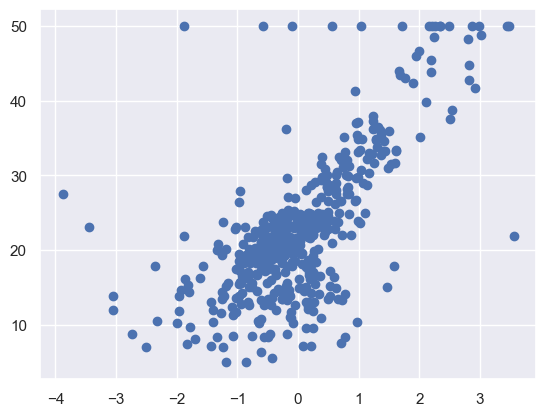

In [8]:
sns.set()
plt.scatter(df_features["RM"], df_target)

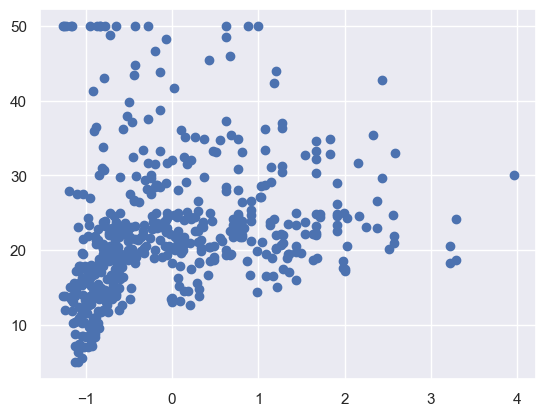

In [9]:
plt.scatter(df_features["DIS"], df_target)

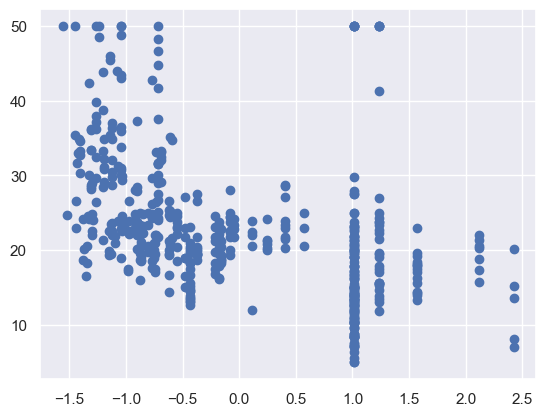

In [10]:
plt.scatter(df_features["INDUS"], df_target)

**HW1.** *Multiple variables cost function:* Write a function `compute_cost_linreg()` to compute the cost function of a linear regression model. The function should take in two 2-D numpy arrays. The first one is the matrix of the linear equation and the second one is the actual target value.

Recall that:

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

where

$$\hat{y}(x) =  \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \ldots + \hat{\beta}_n x_n$$

The function should receive three Numpy arrays:
- `X`: is the feature 2D Numpy array
- `y`: is the target 2D Numpy array
- `beta`: is the parameter 2D Numpy array

The function should return the cost which is a float.

You can use the following function in your code:
- `np.matmul(array1, array2)`

Note that if you wrote your Cohort session's `compute_cost_linreg()` using proper Matrix operations to do the square and the summation, the code will be exactly the same here and you just need to copy and paste it here.

In [11]:
def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    ###
    ### YOUR CODE HERE
    ###
    m = X.shape[0]
    yhat = calc_linreg(X, beta)
    
    J = (1/(2*m)) * np.matmul((y-yhat).T, y-yhat)
    
    return np.squeeze(J)


In [12]:
X: np.ndarray = prepare_feature(df_features.to_numpy())
target: np.ndarray = df_target.to_numpy()

assert isinstance(X, np.ndarray)
assert isinstance(target, np.ndarray)
assert X.shape == (506, 4)
assert target.shape == (506, 1)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [14]:
beta: np.ndarray = np.zeros((4,1))
J: np.ndarray = compute_cost_linreg(X, target, beta)
print(J)
assert np.isclose(J, 296.0734, rtol=1e-3)

beta: np.ndarray = np.ones((4,1))
J: np.ndarray = compute_cost_linreg(X, target, beta)
print(J)
assert np.isclose(J, 270.4083, rtol=1e-3)

beta: np.ndarray = np.array([-1, 2, 1, 2]).reshape((4,1))
J: np.ndarray = compute_cost_linreg(X, target, beta)
print(J)
assert np.isclose(J, 314.8510, rtol=1e-3)


###
### AUTOGRADER TEST - DO NOT REMOVE
###


296.0734584980238
270.4053445844303
314.8486460321335


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW2.** *Gradient Descent:* Write a function called `gradient_descent_linreg()` that takes in four parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

You can use some of the following functions:
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `compute_cost_linreg()`: which the function you created in the previous problem set to compute the cost.

Note that if you use proper matrix operations in your cohort sessions for the gradient descent function, the code will be the same here.

In [16]:
def gradient_descent_linreg(X: np.ndarray, 
                            y: np.ndarray, 
                            beta: np.ndarray, 
                            alpha: float, 
                            num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    ###
    ### YOUR CODE HERE
    ###
    
    # beta0 = beta0 - 1/m * (y_hat - y)
    # beta1 = beta1 - 1/m * (y_hat - y) * X
    m = X.shape[0]
    J_storage = np.empty(shape=(num_iters))
    
    for i in range(num_iters):
        beta = beta - (alpha/m) * np.matmul(X.T, calc_linreg(X, beta) - y)
        cost = compute_cost_linreg(X, y, beta)
        J_storage[i] = cost
    
    return beta, J_storage


In [17]:
iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((4,1))

beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)
print(beta)
assert np.isclose(beta[0], 22.5328, rtol=1e-3)
assert np.isclose(beta[1], 5.4184, rtol=1e-3)
assert np.isclose(beta[2], -0.9029, rtol=1e-3)
assert np.isclose(beta[3], -2.9554, rtol=1e-3)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


[[22.53279993]
 [ 5.41845013]
 [-0.90294093]
 [-2.95543739]]


In [18]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


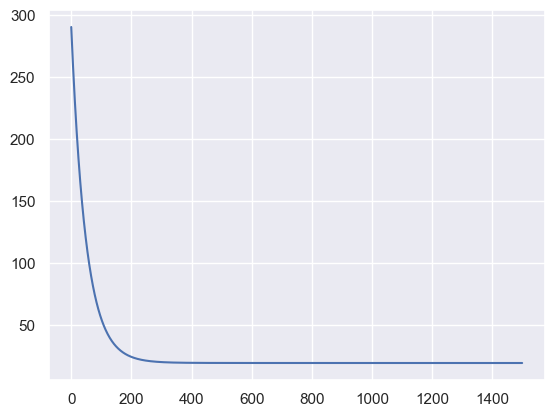

In [19]:
plt.plot(J_storage)


**HW3.** Do the following tasks:
- Get the features and the targets.
    - features: RM, DIS, INDUS
    - target: MEDV
- Use the previous functions called `predict()` to calculated the predicted values given the features and the model. 
- Create a target numpy array from the data frame.

In [20]:
# This is from the previous result
beta: np.ndarray = np.array([[22.53279993],
       [ 5.42386374],
       [-0.90367449],
       [-2.95818095]])

# Extract the feature and the target
# df_features, df_target = None, None
df_features, df_target = get_features_targets(df, ['RM', 'DIS', 'INDUS'], ['MEDV'])

# Call predict()
# pred: np.ndarray = None
pred = predict_linreg(df_features, beta)

# Change target to numpy array
# target: np.ndarray = None
target = df_target.to_numpy() if isinstance(df_target, pd.DataFrame) else df_target

###
### YOUR CODE HERE
###



In [21]:
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 22.5328, rtol=1e-3)
assert np.isclose(pred.std(), 6.7577, rtol=1e-3)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


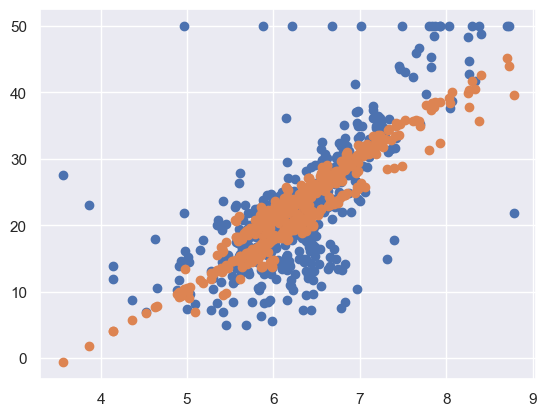

In [23]:
plt.scatter(df_features["RM"],target)
plt.scatter(df_features["RM"],pred)

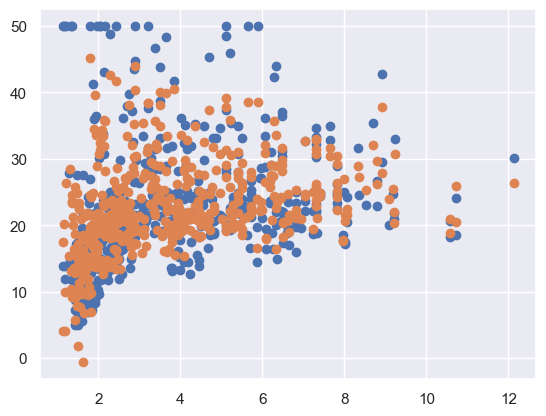

In [24]:
plt.scatter(df_features["DIS"],target)
plt.scatter(df_features["DIS"],pred)

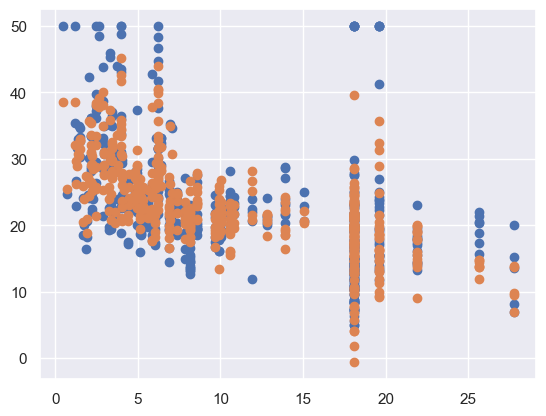

In [25]:
plt.scatter(df_features["INDUS"],target)
plt.scatter(df_features["INDUS"],pred)

**HW4.** *Splitting data:*  Do the following tasks:
- Extract the following:
    - features: RM, DIS, and INDUS
    - target: MEDV 
- Use Week 9's function `split_data()` to split the data into train and test using `random_state=100` and `test_size=0.3`.
- Normalize and prepare the features and the target.
- Use the training data set and call `gradient_descent_linreg()` to obtain the `theta`.
- Use the test data set to get the predicted values.

You need to replace the `None` in the code below with other a function call or any other Python expressions. 

In [26]:
# Extract the features and the target
# df_features, df_target = None, None
df_features, df_target = get_features_targets(df, ['RM', 'DIS', 'INDUS'], ['MEDV'])

# Split the data set into training and test
# df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize the features using z normalization
# array_features_train_z, means, stds = None, None, None
df_features_train = df_features_train.to_numpy() if isinstance(df_features_train, pd.DataFrame) else df_features_train
array_features_train_z, means, stds = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
# X: np.ndarray = None
# target: np.ndarray = None
X = prepare_feature(array_features_train_z)
target = df_target_train.to_numpy() if isinstance(df_target_train, pd.DataFrame) else df_target_train

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((4,1))

# Call the gradient_descent function
# beta, J_storage = None, None
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

# call the predict() method
# pred: np.ndarray = None
pred = predict_linreg(df_features_test, beta, means, stds)

###
### YOUR CODE HERE
###


In [27]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [28]:
assert isinstance(pred, np.ndarray)
assert pred.shape == (151, 1)
# print(pred.mean(), pred.std())
assert np.isclose(pred.mean(), 22.0681, rtol=1e-3)
assert np.isclose(pred.std(), 6.2982, rtol=1e-3)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [29]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


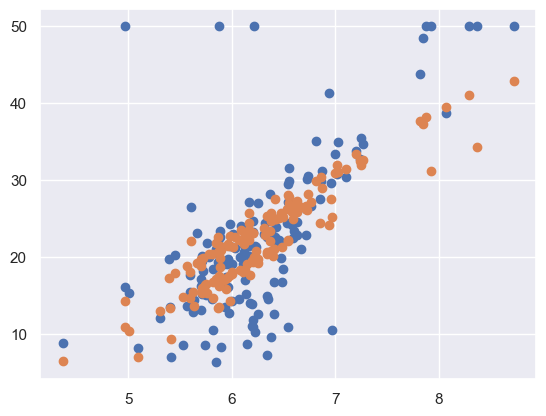

In [30]:
plt.scatter(df_features_test["RM"], df_target_test)
plt.scatter(df_features_test["RM"], pred)

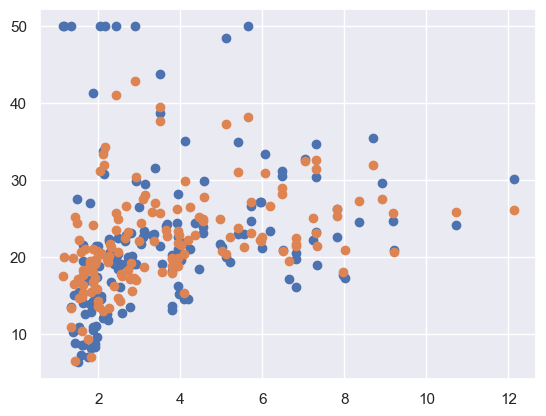

In [31]:
plt.scatter(df_features_test["DIS"], df_target_test)
plt.scatter(df_features_test["DIS"], pred)

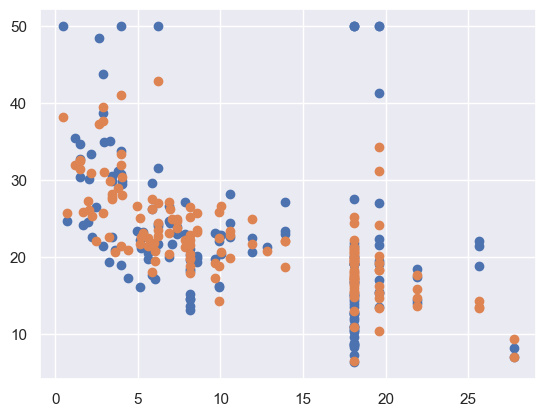

In [32]:
plt.scatter(df_features_test["INDUS"], df_target_test)
plt.scatter(df_features_test["INDUS"], pred)

**HW5.** Calculate the coefficient of determination, $r^2$.

In [33]:
# change target test set to a numpy array
# target: np.ndarray = None

# Calculate r2 score by calling a function
# r2: float = None
df_target_test = df_target_test.to_numpy() if isinstance(df_target_test, pd.DataFrame) else df_target_test
r2 = r2_score(df_target_test, pred)

###
### YOUR CODE HERE
###

print(r2)


(1, 1)
[[0.4718119]]


In [34]:
assert np.isclose(r2, 0.47181, rtol=1e-3)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [35]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW6.** Calculate the mean squared error.

In [36]:
# Calculate the mse
# mse: float = None
df_target_test = df_target_test.to_numpy() if isinstance(df_target_test, pd.DataFrame) else df_target_test
mse = mean_squared_error(df_target_test, pred)

###
### YOUR CODE HERE
###
print(mse)


[[51.88586828]]


In [37]:
assert np.isclose(mse, 51.8858, rtol=1e-3)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [38]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW7.** *Polynomial Transformation:* Redo the steps for breast cancer data but this time we will use quadratic model. Use the following columns:
- x data: radius_mean
- y data: area_mean

We will create a quadratic hypothesis for this x and y data. To do that write a function `transform_features(df, colname, colname_transformed)` that takes in a dataframe for the features, the original column name, and the transformed column name. The function should add another column with the name `colname_transformed` with the value of column in `colname` transformed to its quadratic value. 

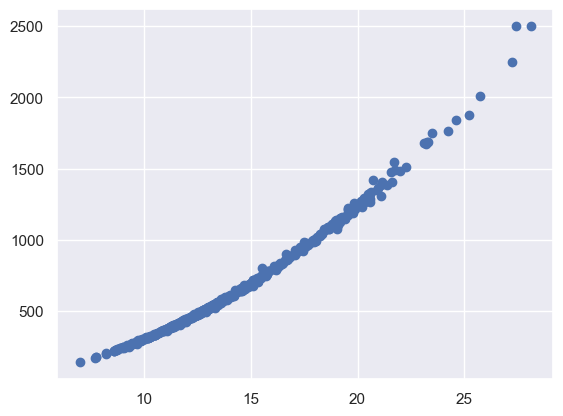

In [39]:
# Read from breast_cancer_data.csv file
# df: pd.DataFrame = None
df = pd.read_csv('breast_cancer_data.csv')

# Extract feature and target
# df_feature, df_target = None, None
df_feature, df_target = get_features_targets(df, ['radius_mean'], ['area_mean'])
###
### YOUR CODE HERE
###

plt.scatter(df_feature, df_target)

In [40]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [41]:
# write your function to create a quadratic feature of x

def transform_features(df_feature: pd.DataFrame, 
                       colname: str, 
                       colname_transformed: str) -> pd.DataFrame:
    ###
    ### YOUR CODE HERE
    ###
    df_feature.loc[:, colname_transformed] = df_feature[colname] * df_feature[colname]
    return df_feature


In [42]:
df_features: pd.DataFrame = transform_features(df_feature, "radius_mean", "radius_mean^2")

assert np.allclose(df_features.loc[:,"radius_mean^2"], df_features.loc[:,"radius_mean"] ** 2)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


/var/folders/_x/gw6ykt6d66nc8w6m20r61mr40000gn/T/ipykernel_53280/1738101480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.loc[:, colname_transformed] = df_feature[colname] * df_feature[colname]


In [43]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [44]:
# split data using random_state = 100 and 30% test size
# df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# normalize features
# array_features_train_z, means, stds = None, None, None
df_features_train = df_features_train.to_numpy() if isinstance(df_features_train, pd.DataFrame) else df_features_train
array_features_train_z, means, stds = normalize_z(df_features_train)

# change to numpy array and append column for feature
# X: np.ndarray = None
# target: np.ndarray = None
X = prepare_feature(array_features_train_z)
target = df_target_train.to_numpy() if isinstance(df_target_train, pd.DataFrame) else df_target_train

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((3,1))

# call gradient_descent() function
# beta, J_storage = None, None
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

###
### YOUR CODE HERE
###


In [45]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [46]:
print(beta)
assert np.isclose(beta[0], 646.0787, rtol=1e-3)
assert np.isclose(beta[1], 146.2331, rtol=1e-3)
assert np.isclose(beta[2], 201.7903, rtol=1e-3)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


[[646.0787641 ]
 [146.23315177]
 [201.79029886]]


In [47]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


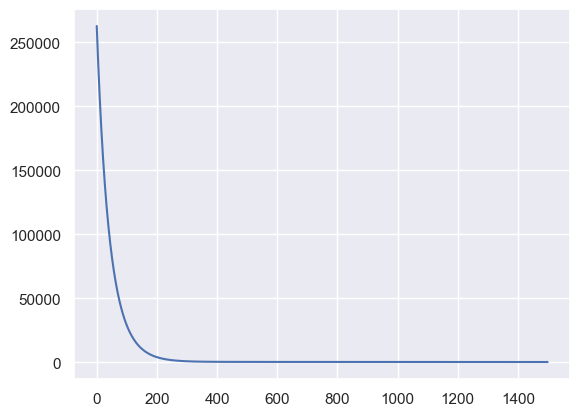

In [48]:
plt.plot(J_storage)

In [49]:
# change target to numpy array
beta: np.ndarray = np.array([[646.0787], [146.2331], [201.7903]])

# Replace the None below
# target: np.ndarray = None
# pred: np.ndarray = None

target = df_target_test.to_numpy() if isinstance(df_target_test, pd.DataFrame) else df_target_test
pred = predict_linreg(df_features_test, beta, means, stds)

# get predicted values
###
### YOUR CODE HERE
###


In [50]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


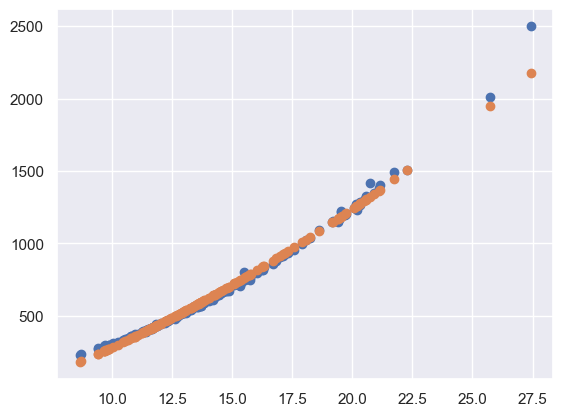

In [51]:
plt.scatter(df_features_test["radius_mean"], target)
plt.scatter(df_features_test["radius_mean"], pred)

In [52]:
target: np.ndarray = df_target_test.to_numpy()
r2: float = r2_score(target, pred)
print(r2)
assert np.isclose(r2, 0.99235, rtol=1e-3)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


(1, 1)
[[0.9923535]]


In [53]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [54]:
target: np.ndarray = df_target_test.to_numpy()
mse: float = mean_squared_error(target, pred)
print(mse)
assert np.isclose(mse, 984.54038, rtol=1e-3)

###
### AUTOGRADER TEST - DO NOT REMOVE
###


[[984.54038172]]


In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW8.** *Optional:* Redo the above tasks using Sci-kit learn libraries. You will need to use the following:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2_score_sk
from sklearn.metrics import mean_squared_error as mse_sk
from sklearn.preprocessing import PolynomialFeatures

**Redo HW 4 using Scikit Learn**

In [57]:
# Read the housing_processed.csv file
# df: pd.DataFrame = None

df = pd.read_csv('housing_processed.csv')

# extract the features from ["RM", "DIS", "INDUS"] and target from []"MEDV"]
# df_features, df_target = None, None
# normalize
# df_features,_,_ = None, None, None
df_features, df_target = get_features_targets(df, ['RM', 'DIS', 'INDUS'], ['MEDV'])
df_features, _, _ = normalize_z(df_features)

###
### YOUR CODE HERE
###


In [58]:
# Split the data into training and test data set using scikit-learn function
# df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features, df_target, random_state=100, test_size=0.3)

# Instantiate LinearRegression() object
# model: LinearRegression = None
model = LinearRegression()

# Call the fit() method
# pass
model.fit(df_features_train, df_target_train)

###
### YOUR CODE HERE
###
print(model.coef_, model.intercept_)
assert np.isclose(model.coef_, [ 5.01417104, -1.00878266, -3.27301726]).all()
assert np.isclose(model.intercept_, 22.45962454)

[[ 5.01417104 -1.00878266 -3.27301726]] [22.45962454]


In [59]:
# Call the predict() method
# pred: np.ndarray = None
pred = model.predict(df_features_test)
###
### YOUR CODE HERE
###


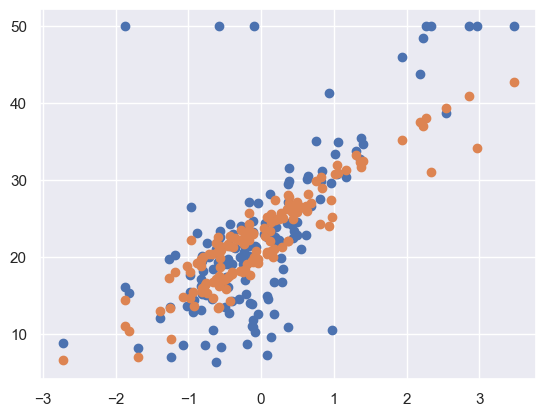

In [60]:
plt.scatter(df_features_test["RM"], df_target_test)
plt.scatter(df_features_test["RM"], pred)

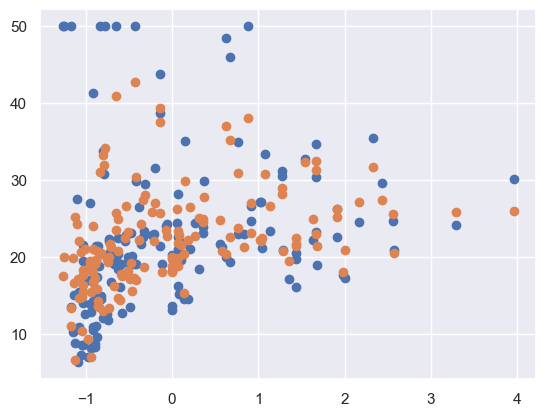

In [61]:
plt.scatter(df_features_test["DIS"], df_target_test)
plt.scatter(df_features_test["DIS"], pred)

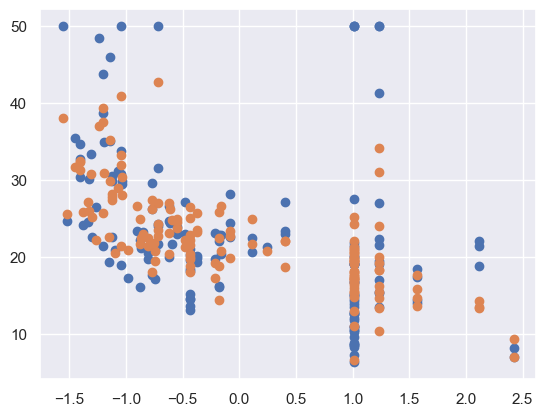

In [62]:
plt.scatter(df_features_test["INDUS"], df_target_test)
plt.scatter(df_features_test["INDUS"], pred)

In [63]:
r2: float = r2_score_sk(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.48250)

0.4825044614020386


In [64]:
mse: float = mse_sk(df_target_test, pred)
print(mse)
assert np.isclose(mse, 52.41451)

52.41451054054569


**Redo HW7 Using Scikit Learn**

In [65]:
# Read the file breast_cancer_data.csv
# df: pd.DataFrame = None
# extract feature from "radius_mean" and target from "area_mean"
# df_feature, df_target = None, None

df = pd.read_csv('breast_cancer_data.csv')
df_feature, df_target = get_features_targets(df, ['radius_mean'], ['area_mean'])

###
### YOUR CODE HERE
###


In [66]:
# instantiate a PolynomialFeatures object with degree = 2
# poly: PolynomialFeatures = None
poly = PolynomialFeatures(2)

# call its fit_transform() method
# df_features: pd.DataFrame = None
df_features = poly.fit_transform(df_feature)

# call train_test_split() to split the data
# df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features, df_target, random_state=100, test_size=0.3)

# instantiate LinearRegression() object
# model: LinearRegression = None
model = LinearRegression()

# call its fit() method
# pass
model.fit(df_features_train, df_target_train)

### BEGIN SOLUTON
poly: PolynomialFeatures = PolynomialFeatures(2)
df_features: pd.DataFrame = poly.fit_transform(df_feature)
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features, df_target, random_state=100, test_size=0.3)
model: LinearRegression = LinearRegression()
model.fit(df_features_train, df_target_train)
### END SOLUTION
print(model.coef_, model.intercept_)
assert np.isclose(model.coef_, [0., 3.69735512, 2.9925278 ]).all()
assert np.isclose(model.intercept_, -32.3684598)

[[0.         3.69735512 2.9925278 ]] [-32.3684598]


In [67]:
# Call the predict() method
# pred: np.ndarray = None

###
### YOUR CODE HERE
###
pred = model.predict(df_features_test)

print(type(pred), pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 672.508465)
assert np.isclose(pred.std(), 351.50271)

<class 'numpy.ndarray'> 672.5084652255059 351.5027059924611


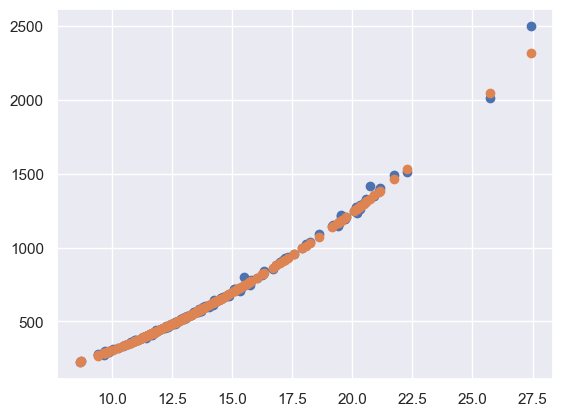

In [68]:
plt.scatter(df_features_test[:,1], df_target_test)
plt.scatter(df_features_test[:,1], pred)

In [69]:
r2: float = r2_score_sk(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.99729)

0.997293116020538


In [70]:
mse: float = mse_sk(df_target_test, pred)
print(mse)
assert np.isclose(mse, 346.79479)

346.79478986089794
